In [1]:
import matplotlib.pylab as plt
import numpy as np
import re
%matplotlib inline

## Plotting

From web data digitilizer

In [2]:
#FROM web data digitalizer

#experimental data at 298 K 
exper_fracs = [0, 0.5/100, 0.9984326018808776/100, 1.4968652037617554/100, 1.9984326018808776/100]
exper_speeds = [35.97260273972603, 24.575342465753423, 16.246575342465754, 9.890410958904113, 6]

ugly = [0, 38.986301369863014,
0.12068965517241381, 36.08219178082192,
0.22727272727272718, 33.61643835616439,
0.32131661442006265, 31.369863013698634,
0.40282131661442, 29.34246575342466,
0.49686520376175536, 27.095890410958905,
0.5721003134796236, 25.616438356164387,
0.6818181818181817, 23.424657534246577,
0.7821316614420062, 21.5068493150685,
0.891849529780564, 19.47945205479452,
0.9984326018808776, 17.561643835616444,
1.1520376175548586, 15.150684931506852,
1.3087774294670846, 12.958904109589042,
1.4811912225705324, 10.93150684931507,
1.6567398119122256, 9.287671232876711,
1.8197492163009403, 8.027397260273979,
1.9984326018808776, 6.986301369863014,
2.1959247648902815, 6,
2.384012539184953, 5.397260273972606,
2.606583072100313, 4.794520547945204,
2.813479623824451, 4.410958904109592,
2.998432601880878, 3.972602739726028]

NIST_fracs = []
NIST_speeds = []

for id, val in enumerate(ugly):
    if id % 2 == 0:
        NIST_fracs.append(val/100)
    else: 
        NIST_speeds.append(val)
        

edited RMG Data

In [3]:
vol_fracs = [0.0,0.0034246488829682868,0.006825921381900819,0.01020405603073009,0.01355928812903828,0.016891849796691408,0.02020197002736977,0.023489874741020596,0.02675578683525816,0.029999926235735837]

#edited RMG data

rxn_1030 = np.array([0.3683611832365185,0.31210101861974476,0.27208567512052867,0.23177925653237835,0.18929004558049844,0.1462746366117164,0.11037056302838151,0.08607359026375629,0.07009883912966354,0.058393924865554045])
rxn_104 =np.array([0.36538414423594173,0.3088308444338415,0.26946609915937664,0.22873282073074958,0.18732066529775238,0.14597316490499954,0.11045719283045595,0.08624929892630062,0.0705044567057806,0.05850669228815252])
rxn_117=np.array([0.35830795982823765,0.3003883071082998,0.2598014202721033,0.21732768465516647,0.17320823847624117,0.1328036785755045,0.09977862428027806,0.07995373671053055,0.06613386224262732,0.05508754538328864])
rxn_123=np.array([0.36417828602855296,0.308015815940431,0.26790530638622123,0.2269187386525978,0.18382213484473747,0.14257928589522229,0.10716028647134417,0.08404652364380773,0.06856796908669963,0.05693595873410093])
rxn_124=np.array([0.36784687167945274,0.31020786889106855,0.2693604752053951,0.22783952606108962,0.18437585986138386,0.14291376808339018,0.10739870266138697,0.08419064047309487,0.06865469971444606,0.05699169088940779])
rxn_15=np.array([0.36891310485135154,0.3107567520851283,0.26964848817034665,0.2279764102650621,0.18443294909550917,0.1429247606017104,0.10740296339076245,0.08419059071278276,0.06865331024371708,0.056989780053743465])
rxn_16=np.array([0.36335945470089315,0.30720504826478284,0.2678648995889328,0.22697463255013464,0.1838869106592217,0.14261222652155583,0.10720205183479582,0.08405946769597755,0.06856334922742717,0.05692144320726515])
rxn_163=np.array([0.3691247557178395,0.3122502569327559,0.27162836095883747,0.23151575028554666,0.1886964565431464,0.14642723845376648,0.10940291344939053,0.0858334148393165,0.06988788243893279,0.05796757299271572])
rxn_245= np.array([0.3996543168240866, 0.3374384300602, 0.29407257261185016, 0.2517555131105655, 0.2047276309859757, 0.15966494195526806, 0.12158171216838609, 0.09276758678641732, 0.07506593223999823, 0.061853625220076404])
rxn_34=np.array([0.3681490699463576,0.31038297434970946,0.2694297576376632,0.22781997549406846,0.18435294279782807,0.14288661151843293,0.10737930313558113,0.08417962756541969,0.06864779223838632,0.05698658682080832])
rxn_37=np.array([0.3838162875007396,0.31932648972120997,0.27463622783875724,0.2318810045057013,0.18716313970037868,0.14410116258582042,0.10792782861100975,0.08438893744617644,0.0687346330202299,0.057028427899174956])
rxn_4=np.array([0.36516817085818,0.30842434263165247,0.26826564348151083,0.22681231401363397,0.1842078918113981,0.1429398534116627,0.1074483547450743,0.0842237676231901,0.06868105853026484,0.05697503177375884])
rxn_411=np.array([0.36836118323651923,0.31050750268420646,0.26951255749537,0.2278990673411297,0.18438863897610028,0.1429082320431312,0.10739016601621147,0.08418419891876612,0.06864983713304847,0.05698763096949572])
rxn_412=np.array([0.36836118323651845,0.3105076283048819,0.2695128172909166,0.22789946613022963,0.18438916925493318,0.1429087785778959,0.10739053748308869,0.08418438770625213,0.06864993995434025,0.05698769627877426])
rxn_558=np.array([0.36836118323651845,0.30971906678785716,0.267772291380972,0.22486862289312792,0.18082984038420566,0.1385166943944439,0.10226581152501237,0.08010931482718521,0.06495975159068859,0.05361173783498955])
rxn_663=np.array([0.36836118323651845,0.3105076283048819,0.2695128172909166,0.22789946613022963,0.18438916925493318,0.1429087785778959,0.10739053748308869,0.08418438770625213,0.06864993995434025,0.05698769627877426])
rxn_763=np.array([0.36836118323651856,0.30627788580428217,0.26527480673397946,0.22290943505724492,0.1813042162064378,0.14155305244421695,0.10708468339556614,0.08456718047106573,0.06930528756744672,0.058040931114451424])
rxn_94=np.array([0.46643264423188485,0.38542739326684505,0.3266160304495134,0.2731051364610409,0.21638398998267352,0.16509002788191687,0.12252351279840573,0.09243644998406372,0.07446576512868637,0.06120868995119319])
rxn_97=np.array([0.38087228334812034,0.31831514230802094,0.2749228841852568,0.23208383760122012,0.18718895027125923,0.1444107418232707,0.10839616416212251,0.0848129748945892,0.06907551936721329,0.057372776657511095])


#RMG original
rxn_746_NC = np.array([0.36836118323651834,0.31050762830488216,0.2695128172909165,0.22789946613022974,0.18438916925493348,0.1429087785778958,0.10739053748308872,0.08418438770424427,0.0686499399546852,0.05698769585957772])



In [4]:
variables = [rxn_245,rxn_1030, rxn_104, rxn_117, rxn_123, rxn_124, rxn_15, rxn_16, rxn_163,  rxn_34, rxn_37, rxn_4, rxn_411, rxn_412, rxn_558, rxn_663, rxn_763, rxn_94, rxn_97]
# rxn_245,

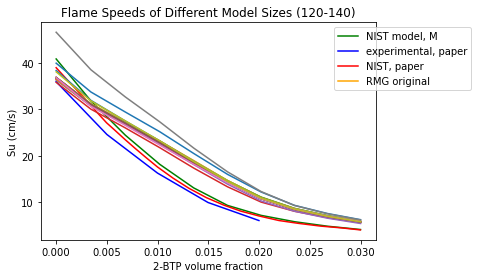

In [5]:
fig = plt.figure()

# NIST with Ms
M_BTP_vol_fracs = [0.0,0.0034246488829682868,0.006825921381900819,0.01020405603073009,0.01355928812903828,0.016891849796691408,0.02020197002736977,0.023489874741020596,0.02675578683525816,0.029999926235735837]
M_BTP_spds = np.array([0.40875258641290235,0.3182666324650983,0.2440402557602658,0.18139435112886126,0.1303768658455397,0.09263736887130462,0.0711125967129613,0.05744824265032554,0.04768965204998258,0.04058391866598579])
M_BTP_speeds = M_BTP_spds*100


#plotting
ax1 = fig.add_subplot(111)  

ax1.plot(M_BTP_vol_fracs, M_BTP_speeds, '-', c='g', label='NIST model, M' )
ax1.plot(exper_fracs, exper_speeds, '-', c='b', label='experimental, paper' )
ax1.plot(NIST_fracs, NIST_speeds, '-', c='r', label='NIST, paper' )

#RMG's 2-BTP (same as "changing" 746 because there was no change in kinetics)
ax1.plot(vol_fracs, rxn_746_NC * 100, '-', c='orange', label='RMG original' )

for var in variables: 
    match = re.search('rxn_([0-9]+)',str(var))
    ax1.plot(vol_fracs, var * 100, '-', label=match )


plt.xlabel('2-BTP volume fraction')
plt.ylabel('Su (cm/s)')
plt.title('Flame Speeds of Different Model Sizes (120-140)')
ax1.legend(bbox_to_anchor=(0.5, 0., 0.8, 1))
  

NameError: name 'rxn_685' is not defined

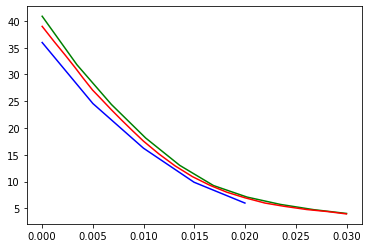

In [6]:
fig = plt.figure()

# NIST with Ms
M_BTP_vol_fracs = [0.0,0.0034246488829682868,0.006825921381900819,0.01020405603073009,0.01355928812903828,0.016891849796691408,0.02020197002736977,0.023489874741020596,0.02675578683525816,0.029999926235735837]
M_BTP_spds = np.array([0.40875258641290235,0.3182666324650983,0.2440402557602658,0.18139435112886126,0.1303768658455397,0.09263736887130462,0.0711125967129613,0.05744824265032554,0.04768965204998258,0.04058391866598579])
M_BTP_speeds = M_BTP_spds*100


#plotting
ax1 = fig.add_subplot(111)  

ax1.plot(M_BTP_vol_fracs, M_BTP_speeds, '-', c='g', label='NIST model, M' )
ax1.plot(exper_fracs, exper_speeds, '-', c='b', label='experimental, paper' )
ax1.plot(NIST_fracs, NIST_speeds, '-', c='r', label='NIST, paper' )


ax1.plot(vol_fracs, rxn_685 * 100, '-', label='685' )
ax1.plot(vol_fracs, rxn_746_NC * 100, '-', label='746_NC' )
#ax1.plot(vol_fracs, rxn_91 * 100, '-', label='91' )

#better fitting but wrong data
ax1.plot(RMG_with_840_not_pdep_vf, RMG_with_840_not_pdep*100, '-', label='RMG with 840 replaced, not pdep' ) #replaced with NIST reaction('HF <=> H + F', [3.120000e+13, 0.0, 99320.0])

plt.xlabel('2-BTP volume fraction')
plt.ylabel('Su (cm/s)')
plt.title('Flame Speeds of Different Model Sizes (120-140)')
ax1.legend(bbox_to_anchor=(1, 0., 0.8, 1))
  

In [7]:
rxn_377=np.array([0.3670513357756997,0.3101318596659707,0.2703830201312378,0.22793404657705013,0.184363055469451,0.142713380880048,0.1077303000856186,0.08379185304094278,0.06824936895015894,0.05658505611374588])
#rxn_93=np.array([0.6608652527563084,0.5424288884133931,0.4517219870043714,0.3703790340459448,0.2964685049983405,0.2195396516617953,0.16138385195747443,0.1187553501517982,0.09031106229636837,0.07251288511607244]) 
rxn_2=np.array([0.37227205748402764,0.31341406879319794,0.27096760830772354,0.2285009840288309,0.18519986003404984,0.14309550632588344,0.10745040492679692,0.0842031679127456,0.06864955723378788,0.056977831268589324]) 
rxn_19=np.array([0.36035048990086016,0.30479458191209946,0.26591867487507553,0.22475015643255233,0.1824479901404765,0.14187663126243663,0.10689470889986197,0.08395805430310099,0.06854082723754146,0.05692943435194578])
rxn_12=np.array([0.3664655940735688,0.3088524905526242,0.2681386197751009,0.22693178865596592,0.1838353289248076,0.14269647874042696,0.10734121991662668,0.0841740798994672,0.0686471683234694,0.056986734651869285])
rxn_125=np.array([0.3675184641442471,0.3099758989221097,0.27007918758769595,0.22766682026615576,0.184135719640912,0.14285668615921188,0.10736712659842666,0.08417148780717121,0.06864164267299536,0.05703349900745247])




variables = [rxn_377, rxn_2, rxn_19, rxn_12, rxn_125] #rxn_93, 

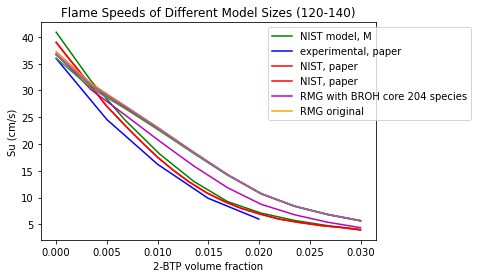

In [10]:
fig = plt.figure()

# NIST with Ms
M_BTP_vol_fracs = [0.0,0.0034246488829682868,0.006825921381900819,0.01020405603073009,0.01355928812903828,0.016891849796691408,0.02020197002736977,0.023489874741020596,0.02675578683525816,0.029999926235735837]
M_BTP_spds = np.array([0.40875258641290235,0.3182666324650983,0.2440402557602658,0.18139435112886126,0.1303768658455397,0.09263736887130462,0.0711125967129613,0.05744824265032554,0.04768965204998258,0.04058391866598579])
M_BTP_speeds = M_BTP_spds*100


#RMG with BROH in core (204 species)
RMG_BROH_spds_204=np.array([0.368315044175012,0.3017671008238044,0.25380733121765137,0.20534112958516446,0.15912066586519652,0.11855354592652835,0.08757491901487018,0.06804028876795941,0.054099501348186745,0.0439099170700266])
vol_fracs_BROH = [0.0,0.0034246488829682868,0.006825921381900819,0.01020405603073009,0.01355928812903828,0.016891849796691408,0.02020197002736977,0.023489874741020596,0.02675578683525816,0.029999926235735837]



#plotting
ax1 = fig.add_subplot(111)  

ax1.plot(M_BTP_vol_fracs, M_BTP_speeds, '-', c='g', label='NIST model, M' )
ax1.plot(exper_fracs, exper_speeds, '-', c='b', label='experimental, paper' )
ax1.plot(NIST_fracs, NIST_speeds, '-', c='r', label='NIST, paper' )
ax1.plot(NIST_fracs, NIST_speeds, '-', c='r', label='NIST, paper' )
ax1.plot(vol_fracs_BROH, RMG_BROH_spds_204*100, '-', c='m', label='RMG with BROH core 204 species' )

#RMG's 2-BTP (same as "changing" 746 because there was no change in kinetics)
ax1.plot(vol_fracs, rxn_746_NC * 100, '-', c='orange', label='RMG original' )

for var in variables: 
    match = re.search('rxn_([0-9]+)',str(var))
    ax1.plot(vol_fracs, var * 100, '-', label=match )


plt.xlabel('2-BTP volume fraction')
plt.ylabel('Su (cm/s)')
plt.title('Flame Speeds of Different Model Sizes (120-140)')
ax1.legend(bbox_to_anchor=(0.5, 0., 0.8, 1))
  

In [21]:
import os
import re
flame_speed_directory = '/work/westgroup/nora/Code/projects/Burgess_Comments/2_BTP_optimization/flame_speeds/RMG_with_BROH/data/'

list_of_blends = [file for file in os.listdir(flame_speed_directory) if re.match('speeds_copy_chem0[0-9]+\.cti', file)]

In [22]:
list_of_blends 

['speeds_copy_chem0130.cti',
 'speeds_copy_chem0131.cti',
 'speeds_copy_chem0132.cti',
 'speeds_copy_chem0133.cti',
 'speeds_copy_chem0134.cti',
 'speeds_copy_chem0135.cti',
 'speeds_copy_chem0136.cti',
 'speeds_copy_chem0137.cti',
 'speeds_copy_chem0138.cti',
 'speeds_copy_chem0139.cti',
 'speeds_copy_chem0140.cti',
 'speeds_copy_chem0141.cti',
 'speeds_copy_chem0142.cti',
 'speeds_copy_chem0143.cti',
 'speeds_copy_chem0144.cti',
 'speeds_copy_chem0145.cti',
 'speeds_copy_chem0146.cti',
 'speeds_copy_chem0147.cti',
 'speeds_copy_chem0148.cti',
 'speeds_copy_chem0149.cti']

speeds_copy_chem0137.cti
speeds_copy_chem0138.cti
speeds_copy_chem0139.cti
speeds_copy_chem0140.cti
speeds_copy_chem0141.cti
speeds_copy_chem0142.cti
speeds_copy_chem0143.cti
speeds_copy_chem0144.cti
speeds_copy_chem0145.cti
speeds_copy_chem0146.cti
speeds_copy_chem0147.cti
speeds_copy_chem0148.cti
speeds_copy_chem0149.cti


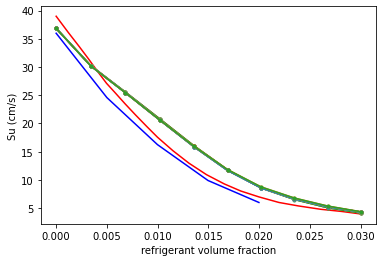

In [20]:
#graphing species 130 to 149 of RMG with BROH in core. 
import pandas as pd

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(exper_fracs, exper_speeds, '-', c='b', label='experimental, paper' )
ax1.plot(NIST_fracs, NIST_speeds, '-', c='r', label='NIST, paper' )


for folder in list_of_blends_: 
   
    print(folder)
    with open(f'{flame_speed_directory}/{folder}','r') as f: 
        values = f.readlines()
    volume_fractions = [float(x) for x in values[1].split(',')]
    speed = [float(x) for x in values[2].split(',')]
    speeds = [x*100 for x in speed]


        
# except: 
#         print(file)
#         pass 

    
    
    
    
    #plotting 

#     fig = plt.figure()
#     ax1 = fig.add_subplot(111)
    ax1.plot(volume_fractions, speeds, '.-', label=f'{folder}' )




    plt.xlabel('refrigerant volume fraction')
    plt.ylabel('Su (cm/s)')

    #plt.legend()

        